In [1]:
import os
import numpy as np
import glob
import seaborn as sns

In [2]:
label_dir = "../data/Label"

In [3]:
dirs = os.listdir(label_dir)
print(dirs)

['p02.label', 'p11.label', 'p06.label', 'p04.label', 'p13.label', 'p08.label', 'p00.label', 'p03.label', 'p12.label', 'p07.label', 'p05.label', 'p14.label', 'p09.label', 'p10.label', 'p01.label']


In [4]:
label_files = glob.glob(label_dir+'/p*')
label_files.sort()
print(label_files)

['../data/Label/p00.label', '../data/Label/p01.label', '../data/Label/p02.label', '../data/Label/p03.label', '../data/Label/p04.label', '../data/Label/p05.label', '../data/Label/p06.label', '../data/Label/p07.label', '../data/Label/p08.label', '../data/Label/p09.label', '../data/Label/p10.label', '../data/Label/p11.label', '../data/Label/p12.label', '../data/Label/p13.label', '../data/Label/p14.label']


In [5]:
pitches = []
yaws = []
for lfile in label_files:
    with open(lfile) as f:
        lines = list(f)
        for line in lines[1:]:
            line = line.strip().split(" ")
            gaze2d = line[7]
            label = np.array(gaze2d.split(",")).astype("float")
#             label = torch.from_numpy(label).type(torch.FloatTensor)
            pitch = label[0]* 180 / np.pi
            yaw = label[1]* 180 / np.pi
            pitches.append(pitch)
            yaws.append(yaw)
#             print(pitch, yaw)

In [6]:
pitches = np.array(pitches)
yaws = np.array(yaws)

/Users/jyao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


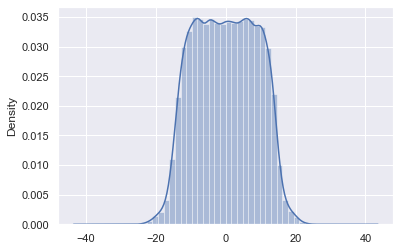

In [7]:
sns.set_theme()
np.random.seed(0)
ax = sns.distplot(pitches)

/Users/jyao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


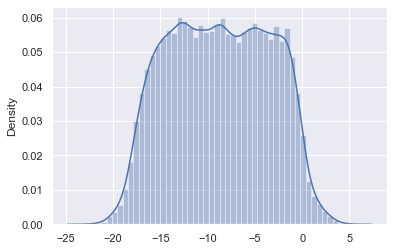

In [8]:
ax = sns.distplot(yaws)

In [12]:

print(sorted(pitches)[0:5], sorted(pitches)[-5:])
print(f"total number of pitch values: {len(pitches)}")
print(pitches.mean())

[-40.479447971048344, -30.23927168178626, -29.150563340762076, -28.98007206003318, -23.913015585162803] [23.42008891568114, 23.913015585162803, 29.150563340762076, 37.728877640447266, 40.479447971048344]
total number of pitch values: 45000
-0.022775486311241135


In [11]:
print(sorted(yaws)[0:5])
print(sorted(yaws)[-5:])
print(f"total number of yaw values: {len(yaws)}")
print(yaws.mean())

[-22.96837232468727, -22.853620186362377, -22.147222576801234, -21.93910032263098, -21.937377033347328]
[4.624485728614039, 4.856808834632299, 4.856808834632299, 5.521903206504496, 5.521903206504496]
total number of yaw values: 45000
-8.73661738071715
